In [136]:

import zipfile
zip_file_path = "Topic4_Netflix_dataset.zip"  # Replace with your actual path

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall()  # Extracts all files in the zip to the current directory


In [1]:
import pandas as pd

df_cust = pd.read_csv('/content/Topic4_Netflix_dataset/topic4_edge_list_10000_customers.csv')

In [2]:
df_cust

,Source,Target,Weight,Date
0,C6,M30,3,2004-09-15
1,C6,M157,3,2004-09-15
2,C6,M173,4,2004-09-15
3,C6,M175,5,2004-10-10
4,C6,M191,2,2004-11-24
...,...,...,...,...
511389,C56520,M4364,3,2005-04-03
511390,C56520,M4432,4,2005-04-03
511391,C56520,M4472,3,2005-04-06
511392,C56520,M4484,1,2005-04-03


In [3]:
filtered_df = df_cust[ (df_cust['Weight'] == 5) ]


In [4]:
import pandas as pd

# Assuming 'Date' is the column containing dates
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# Filter to keep only dates from 2005
filtered_df = filtered_df[filtered_df['Date'].dt.year == 2005]

# Display the filtered DataFrame
print(filtered_df)


        Source Target  Weight       Date
26          C6   M886       5 2005-11-25
139         C6  M4043       5 2005-11-25
153         C7     M8       5 2005-07-30
156         C7    M83       5 2005-10-30
160         C7   M257       5 2005-05-23
...        ...    ...     ...        ...
511363  C56520  M3444       5 2005-04-03
511369  C56520  M3650       5 2005-04-04
511378  C56520  M3903       5 2005-04-03
511379  C56520  M3917       5 2005-04-03
511385  C56520  M4196       5 2005-04-03

[66483 rows x 4 columns]


<ipython-input-4-2043dbe7eaa8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])


In [5]:
filtered_df['Date'].value_counts()

Date
2005-01-19    1018
2005-04-06     517
2005-07-22     453
2005-03-22     390
2005-06-30     364
              ... 
2005-12-24      56
2005-12-26      54
2005-03-31      50
2005-12-09      40
2005-12-25      30
Name: count, Length: 359, dtype: int64

In [6]:
df_cust = filtered_df[['Source','Target']]

In [7]:
df_cust.dropna(inplace=True)

<ipython-input-7-7b1a1fc6761d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cust.dropna(inplace=True)


In [8]:
df_cust

,Source,Target
26,C6,M886
139,C6,M4043
153,C7,M8
156,C7,M83
160,C7,M257
...,...,...
511363,C56520,M3444
511369,C56520,M3650
511378,C56520,M3903
511379,C56520,M3917


In [9]:
df_movie= pd.read_csv('/content/Topic4_Netflix_dataset/topic4_node_list_genre_10000_customers.csv')

In [10]:
df_movie.dropna(inplace=True)

In [11]:
df_movie

,ID,Label,Type,MovieGenre
10000,M30,M30,Movie,Comedy|Drama|Romance
10002,M173,M173,Movie,Action|Drama|War
10003,M175,M175,Movie,Crime|Drama|Thriller
10004,M191,M191,Movie,Action|Sci-Fi|Thriller
10005,M197,M197,Movie,Crime|Mystery|Thriller
...,...,...,...,...
14119,M3260,M3260,Movie,Drama|Horror|Mystery|Romance|Thriller
14120,M3785,M3785,Movie,Documentary|Short|Music
14123,M713,M713,Movie,Crime|Drama
14125,M4128,M4128,Movie,Comedy|Drama|Musical|Romance


In [12]:
#df_cust.merge(df_movie,on='Label')

df_file = df_cust.merge(
    df_movie, left_on="Target", right_on="Label")

In [13]:
df_file

,Source,Target,ID,Label,Type,MovieGenre
0,C6,M886,M886,M886,Movie,Biography|Drama|Music
1,C59,M886,M886,M886,Movie,Biography|Drama|Music
2,C79,M886,M886,M886,Movie,Biography|Drama|Music
3,C116,M886,M886,M886,Movie,Biography|Drama|Music
4,C168,M886,M886,M886,Movie,Biography|Drama|Music
...,...,...,...,...,...,...
54712,C55199,M4344,M4344,M4344,Movie,Animation|Adventure|Comedy|Family|Fantasy|Musical
54713,C56060,M3301,M3301,M3301,Movie,Drama|History|War
54714,C56165,M1049,M1049,M1049,Movie,Comedy|Crime|Drama
54715,C56309,M2374,M2374,M2374,Movie,Action|Adventure|Comedy|Fantasy|Sci-Fi


In [14]:
users = df_file[['Source','MovieGenre']]

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "MovieGenre" column
users["MovieGenreEncoded"] = label_encoder.fit_transform(users["MovieGenre"])

print(users)


       Source                                         MovieGenre  \
0          C6                              Biography|Drama|Music   
1         C59                              Biography|Drama|Music   
2         C79                              Biography|Drama|Music   
3        C116                              Biography|Drama|Music   
4        C168                              Biography|Drama|Music   
...       ...                                                ...   
54712  C55199  Animation|Adventure|Comedy|Family|Fantasy|Musical   
54713  C56060                                  Drama|History|War   
54714  C56165                                 Comedy|Crime|Drama   
54715  C56309             Action|Adventure|Comedy|Fantasy|Sci-Fi   
54716  C56415                                             Family   

       MovieGenreEncoded  
0                    305  
1                    305  
2                    305  
3                    305  
4                    305  
...                  

<ipython-input-15-04820b7967cc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users["MovieGenreEncoded"] = label_encoder.fit_transform(users["MovieGenre"])


In [ ]:
#users = users[["Source","MovieGenreEncoded"]]

In [16]:
users

,Source,MovieGenre,MovieGenreEncoded
0,C6,Biography|Drama|Music,305
1,C59,Biography|Drama|Music,305
2,C79,Biography|Drama|Music,305
3,C116,Biography|Drama|Music,305
4,C168,Biography|Drama|Music,305
...,...,...,...
54712,C55199,Animation|Adventure|Comedy|Family|Fantasy|Musical,240
54713,C56060,Drama|History|War,491
54714,C56165,Comedy|Crime|Drama,318
54715,C56309,Action|Adventure|Comedy|Fantasy|Sci-Fi,17


In [17]:
users = users.groupby(['Source', 'MovieGenreEncoded']).size().reset_index(name='Count')

# Display the DataFrame with user, genre, and count columns
print(users)

       Source  MovieGenreEncoded  Count
0         C10                 48      1
1         C10                486      1
2         C10                515      1
3      C10006                242      1
4      C10006                349      1
...       ...                ...    ...
46864    C998                355      2
46865    C998                406      1
46866    C998                516      3
46867   C9999                338      1
46868   C9999                412      1

[46869 rows x 3 columns]


In [18]:
users.drop_duplicates(inplace=True)

In [19]:
users.set_index('Source',inplace=True)

In [20]:
users

,MovieGenreEncoded,Count
Source,,
C10,48,1
C10,486,1
C10,515,1
C10006,242,1
C10006,349,1
...,...,...
C998,355,2
C998,406,1
C998,516,3


In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

scaler = StandardScaler()
users['normalised'] = scaler.fit_transform(users[['Count']])


In [181]:
users['normalised']

Source
C10      -0.269305
C10      -0.269305
C10      -0.269305
C10006   -0.269305
C10006   -0.269305
            ...   
C9979     1.358799
C998     -0.269305
C998      2.986903
C9999    -0.269305
C9999    -0.269305
Name: normalised, Length: 45233, dtype: float64

In [23]:
# Plot dendrogram

import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import sys

distance_matrix = users[['MovieGenreEncoded', 'normalised']].values

# Perform hierarchical clustering
linkage = hierarchy.linkage(distance_matrix, method='ward')


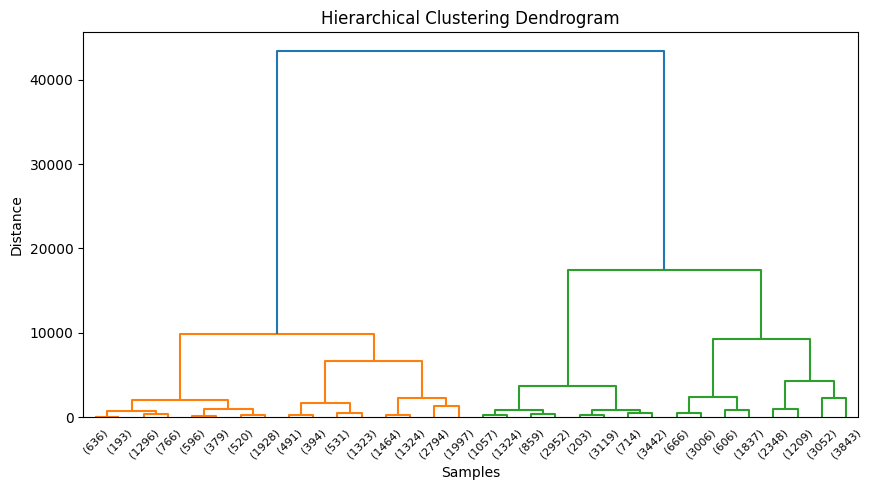

In [24]:

# Plot dendrogram
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(linkage,truncate_mode='level', p=4)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [25]:
users

,MovieGenreEncoded,Count,normalised
Source,,,
C10,48,1,-0.270333
C10,486,1,-0.270333
C10,515,1,-0.270333
C10006,242,1,-0.270333
C10006,349,1,-0.270333
...,...,...,...
C998,355,2,1.344120
C998,406,1,-0.270333
C998,516,3,2.958572


MovieGenreEncoded  Count  normalised
355                1      -0.270333     1442
464                1      -0.270333     1287
305                1      -0.270333     1003
515                1      -0.270333     1000
314                1      -0.270333      990
                                        ... 
593                1      -0.270333        1
0                  2       1.344120        1
442                1      -0.270333        1
446                1      -0.270333        1
452                2       1.344120        1
Name: count, Length: 857, dtype: int64

In [27]:

# Assign cluster labels to the original DataFrame
users['Cluster'] = hierarchy.fcluster(linkage, 2, criterion='maxclust')

print(users)

        MovieGenreEncoded  Count  normalised  Cluster
Source                                               
C10                    48      1   -0.270333        1
C10                   486      1   -0.270333        2
C10                   515      1   -0.270333        2
C10006                242      1   -0.270333        1
C10006                349      1   -0.270333        2
...                   ...    ...         ...      ...
C998                  355      2    1.344120        2
C998                  406      1   -0.270333        2
C998                  516      3    2.958572        2
C9999                 338      1   -0.270333        2
C9999                 412      1   -0.270333        2

[46869 rows x 4 columns]


In [28]:
cluster_user_genres = users.groupby(['Cluster', 'Source'])['MovieGenreEncoded'].apply(lambda x: ', '.join(map(str, x.unique()))).reset_index(name='MovieGenres')

# Display the cluster user genres
print(cluster_user_genres)

       Cluster  Source                              MovieGenres
0            1     C10                                       48
1            1  C10006                                      242
2            1  C10007  11, 40, 48, 75, 151, 171, 187, 191, 256
3            1  C10016                             30, 187, 200
4            1  C10021               29, 75, 114, 122, 130, 242
...        ...     ...                                      ...
11072        2   C9971             339, 355, 357, 406, 464, 510
11073        2   C9972                                 317, 531
11074        2   C9979                            305, 314, 464
11075        2    C998                       298, 355, 406, 516
11076        2   C9999                                 338, 412

[11077 rows x 3 columns]


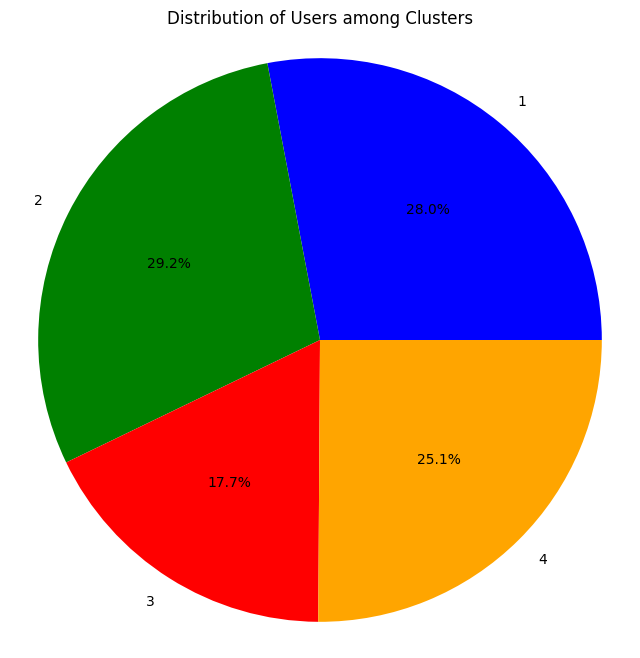

In [141]:
import matplotlib.pyplot as plt

# Calculate the number of users in each cluster
cluster_sizes = cluster_user_genres.groupby('Cluster').size()

# Define colors for each cluster
colors = ['blue', 'green', 'red', 'orange']  # Add more colors if needed

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_sizes, labels=cluster_sizes.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Users among Clusters')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [29]:
decode_mapper = df_file[['Source','MovieGenre']]
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "MovieGenre" column
decode_mapper["MovieGenreEncoded"] = label_encoder.fit_transform(decode_mapper["MovieGenre"])

genre_mapping_dict = dict(zip(decode_mapper['MovieGenreEncoded'], decode_mapper['MovieGenre']))

# Decode the MovieGenreEncoded column
users['DecodedGenre'] = users['MovieGenreEncoded'].map(genre_mapping_dict)

# Display the DataFrame with the decoded genre column
print(users)

        MovieGenreEncoded  Count  normalised  Cluster  \
Source                                                  
C10                    48      1   -0.270333        1   
C10                   486      1   -0.270333        2   
C10                   515      1   -0.270333        2   
C10006                242      1   -0.270333        1   
C10006                349      1   -0.270333        2   
...                   ...    ...         ...      ...   
C998                  355      2    1.344120        2   
C998                  406      1   -0.270333        2   
C998                  516      3    2.958572        2   
C9999                 338      1   -0.270333        2   
C9999                 412      1   -0.270333        2   

                                             DecodedGenre  
Source                                                     
C10                              Action|Adventure|Fantasy  
C10                                 Drama|History|Romance  
C10               

<ipython-input-29-d9a3f8e29a59>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decode_mapper["MovieGenreEncoded"] = label_encoder.fit_transform(decode_mapper["MovieGenre"])


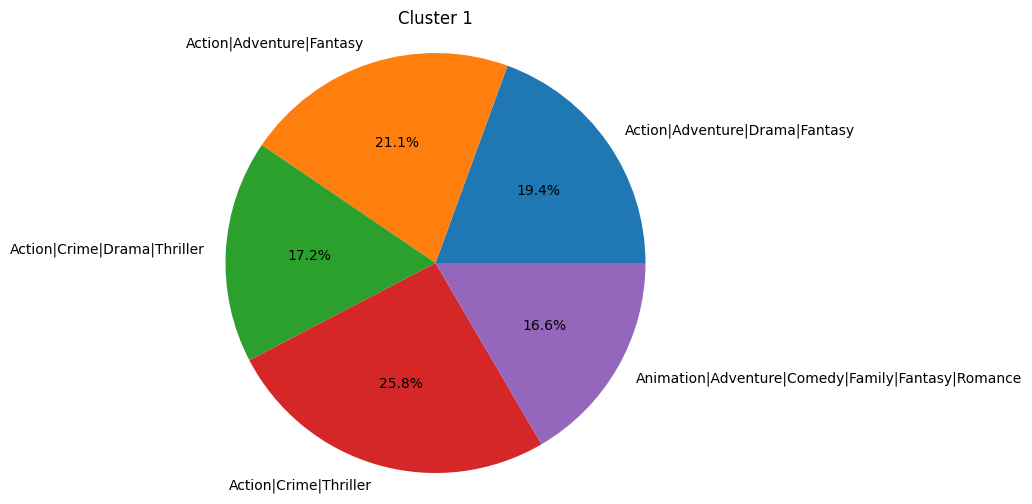

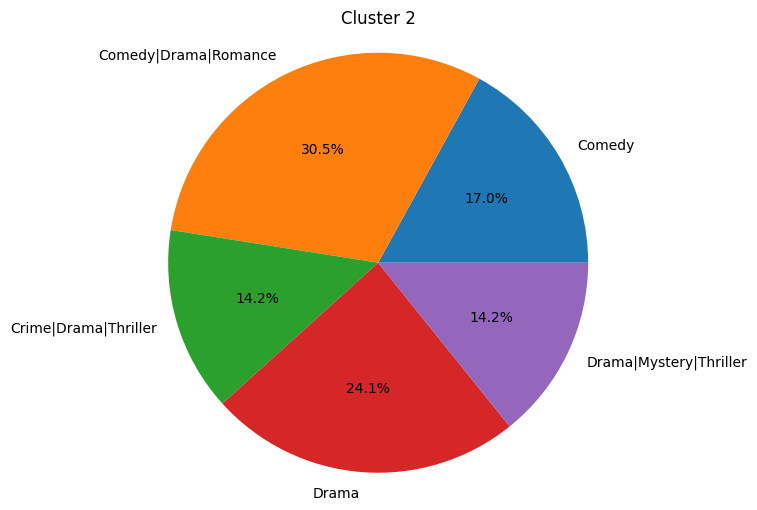

In [31]:
import matplotlib.pyplot as plt

# Group by cluster and genre, and count the occurrences
cluster_genre_counts = users.groupby(['Cluster', 'DecodedGenre']).size().reset_index(name='Count')

# Sort genres within each cluster based on counts
cluster_genre_counts['Rank'] = cluster_genre_counts.groupby('Cluster')['Count'].rank(ascending=False, method='dense')

# Select top 5 genres for each cluster
top5_genres = cluster_genre_counts[cluster_genre_counts['Rank'] <= 5]

# Group by cluster and aggregate top 5 genres
top5_genres_per_cluster = top5_genres.groupby('Cluster')['DecodedGenre'].apply(lambda x: ', '.join(x)).reset_index(name='TopGenres')

# Iterate over each cluster and create a separate figure for each pie chart
for i, cluster in enumerate(top5_genres_per_cluster['Cluster']):
    # Create a new figure for each pie chart
    plt.figure(figsize=(8, 6))

    # Get the top genres and their counts for the current cluster
    labels = top5_genres_per_cluster.loc[top5_genres_per_cluster['Cluster'] == cluster, 'TopGenres'].values[0].split(', ')
    sizes = [top5_genres[top5_genres['Cluster'] == cluster].loc[top5_genres['DecodedGenre'] == genre, 'Count'].values[0] for genre in labels]

    # Create the pie chart
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(f'Cluster {cluster}')
    plt.axis('equal')

    # Show the pie chart
    plt.show()

